# Analysis

This notebook contains routines for analyzing the output of keypoint-MoSeq.

```{note}
For the widgets below to work in a jupyter notebook, you must launch jupyter from a terminal in which the keypoint_moseq environment is active.
```

## Setup

We assume you have already have keypoint-MoSeq outputs that are organized as follows.
```
.
└── <project_dir>/               ** current working directory
    ├── <model_dir>/             ** model directory
        ├── crowd_movies/        ** [Optional] crowd movies folder
        ├── grid_movies/         ** [Optional] grid movies folder
        └── results.h5           ** model results
```

In [2]:
import keypoint_moseq as kpms

project_dir='../../testing/demo_project' # the full path to the project directory
model_dirname='2023_05_23-15_19_03' # name of the model to analyze

Loading BokehJS ...

Check that the required jupyter extensions are enabled. If they are not, run the [installation commands](https://keypoint-moseq.readthedocs.io/en/latest/install.html#install-jupyter-extensions) and confirm that jupyter was launched from the `keypoint_moseq` environment, as mentioned in the note above. 

In [3]:
kpms.check_jupyter_extensions()

✅ The extension nbextensions_configurator is installed and enabled.
✅ The extension jupyter_bokeh is installed and enabled.
✅ The extension qgrid is installed and enabled.


## Assign Groups

The following cell invokes an interactive spreadsheet widget that can be used to annotate each recording with a group label. These labels are important late for performing group-wise comparisons. The annotations are saved to a to  `[project_dir]/index.yaml`.

- Select one or more rows, enter a group name and click `Set Group Name`
- Click any column header to sort rows alphabetically
- Click the filter icon in a column header to filter rows by name. 
- At any point, use `Update Index File` to save current group assignments.

In [4]:
index_file=kpms.interactive_group_setting(project_dir, model_dirname)

Button(description='Clear Output', style=ButtonStyle(), tooltip='Close Cell Output')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

## Generate dataframes

Generate a pandas dataframe called `moseq_df` that contains syllable labels and kinematic information for each frame across all the recording sessions. 

In [5]:
moseq_df = kpms.compute_moseq_df(project_dir, model_dirname, smooth_heading=True) 
moseq_df

,name,centroid_x,centroid_y,heading,angular_velocity,velocity_px_s,syllable,frame_index,group,onset
0,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,249.538038,208.037126,-1.251714,0.000000,0.000000,15,0,mutant,True
1,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,247.151433,210.056701,-1.251714,0.000000,93.792917,15,1,mutant,False
2,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,248.968059,209.160433,-1.276534,-0.744596,60.770742,15,2,mutant,False
3,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,248.976926,206.677482,-1.276534,0.000000,74.488994,15,3,mutant,False
4,21_11_8_one_mouse.top.irDLC_resnet50_moseq_exa...,248.210082,204.428483,-1.277569,-0.031047,71.284239,15,4,mutant,False
...,...,...,...,...,...,...,...,...,...,...
643906,22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...,411.622208,378.498972,-2.630614,-0.343732,38.213065,25,53618,control,False
643907,22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...,411.465067,379.569343,-2.632448,-0.054996,32.455338,25,53619,control,False
643908,22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...,411.017825,379.107318,-2.690113,-1.729957,19.290993,25,53620,control,False
643909,22_27_04_cage4_mouse2_0.top.irDLC_resnet50_mos...,411.039541,379.191913,-2.690113,0.000000,2.620121,25,53621,control,False


In [5]:
import os
save_dir = os.path.join(project_dir, model_dirname) # directory to save the moseq_df dataframe
moseq_df.to_csv(os.path.join(save_dir, 'moseq_df.csv'), index=False)
print('Saved `moseq_df` dataframe to', save_dir)

Saved `moseq_df` dataframe to ../../testing/demo_project/2023_05_23-15_19_03


Next generate a dataframe called `stats_df` that contains summary statistics for each syllable in each recording session, such as its usage frequency and its distribution of kinematic parameters.

In [6]:
stats_df = kpms.compute_stats_df(
    project_dir,
    model_dirname,
    moseq_df, 
    min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=30)                    # frame rate of the video from which keypoints were inferred

stats_df

,group,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration
0,control,21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...,0,-0.261664,1.543096,-3.140792,3.140296,-0.024293,8.183426,-188.280807,188.239369,23.457662,18.388489,0.000000,215.773705,0.113548,0.649621
1,control,21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...,2,0.018136,1.669846,-3.135333,3.136108,-0.169958,13.455746,-187.682184,187.730432,65.710913,46.198689,0.574506,247.706324,0.053871,0.772854
2,control,21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...,3,-0.208569,1.642294,-3.139133,3.133001,0.074535,10.564172,-187.715501,188.137662,36.788006,29.527699,0.388417,210.766411,0.063226,0.589456
3,control,21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...,8,0.639373,1.230071,-3.141189,3.140241,-0.209198,5.657423,-188.442904,3.627077,22.384563,13.205604,0.551636,121.717483,0.011613,1.039815
4,control,21_12_10_def6a_1_1.top.irDLC_resnet50_moseq_ex...,12,0.059674,1.351697,-3.128235,3.098477,0.286838,8.341233,-14.223790,186.801360,43.086525,31.519472,1.105366,202.288333,0.023548,0.245205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,mutant,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,38,0.099191,1.883365,-3.141527,3.140558,-0.049100,13.215127,-188.144430,188.207028,60.054592,44.602610,0.397882,284.398735,0.076898,0.672411
176,mutant,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,43,0.421204,1.881770,-3.120029,3.111892,-0.002808,0.205471,-2.151849,1.844776,14.501298,8.734899,0.402381,64.283080,0.060373,0.294038
177,mutant,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,45,0.331332,1.976543,-3.136298,3.140915,-0.097378,16.096742,-188.144966,188.288686,30.073487,24.276846,0.176342,211.904965,0.009162,0.966071
178,mutant,21_12_2_def6b_2.top.irDLC_resnet50_moseq_examp...,47,-0.190006,1.816613,-2.821556,3.002993,0.015453,1.841167,-14.607579,12.470749,56.313349,50.254563,1.479847,618.617462,0.008017,0.375510


In [ ]:
import os
save_dir = os.path.join(project_dir, model_dirname)
stats_df.to_csv(os.path.join(save_dir, 'stats_df'), index=False)
print('Saved `stats_df` dataframe to', save_dir)

## Fingerprint plot

Fingerprint plots show the distribution of syllable frequencies and kinematic parameters in each recording. For each statistic, a heatmap is generated where rows represent recordings, columns represent possible values of the statistic, and color indicates the probability of that value in that recording. By default, the plot is saved to `[project_dir]/[model_dirname]/analysis_figures`

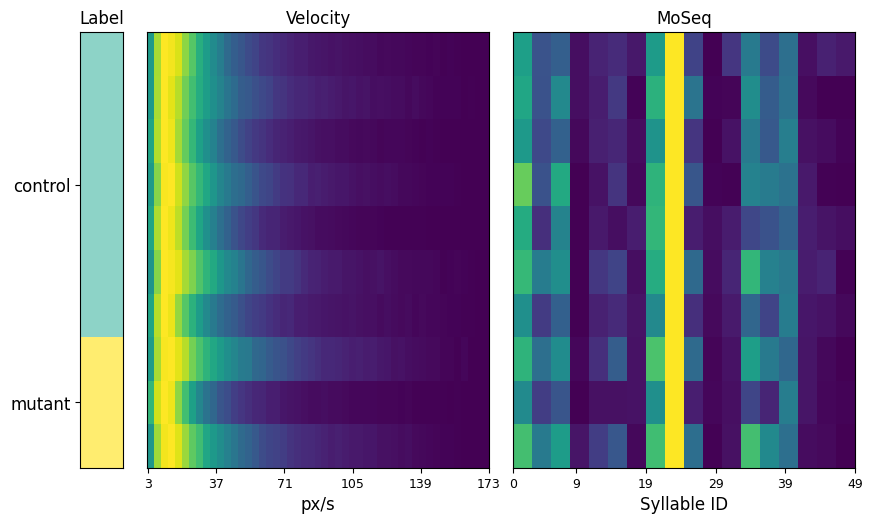

In [7]:
kpms.plot_fingerprint(
    project_dir, model_dirname, moseq_df, stats_df,
    n_bins=50, # number of histogram bins
    range_type='robust', # method for setting histogram ranges
    color_bar=False, # whether to include colorbars
    figsize=(10, 6), # the size of full the figure
) 


##  Label syllables

Assign a name and short description to each syllable for downstream interpretation.

### Syllable labeling widget

In [5]:
kpms.label_syllables(project_dir, model_dirname, moseq_df, movie_type='grid') # `movie_type` can be "grid" or "crowd"

Loading BokehJS ...

Button(description='Clear Output', style=ButtonStyle(), tooltip='Close Cell Output')

Dropdown(description='Syllable #:', options={}, value=None)

Output()

## Compare between groups

Test for statistically significant differences between groups. The code below takes two groups (an experimental group and a control group) and a syllable property (e.g. frequency or duration), and tests each syllable for whether the property differs between groups. The results are summarized in a plot that is saved to `[project_dir]/[model_dirname]/analysis_figures`.

When keyword `order` is set to "diff", the syllabes ordering will be sorted as differences between `ctrl_group` and `exp_group`. `groups` specifies the groups to be included in the plot and it could be all the groups or a subset of the groups.

(<Figure size 1000x500 with 1 Axes>, <matplotlib.legend.Legend at 0x15c7bf6d0>)

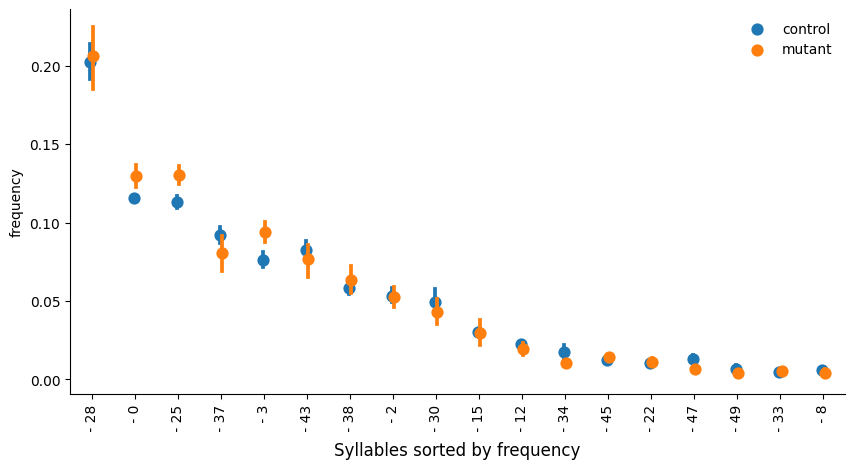

In [6]:
kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_dirname, 
    plot_sig=True,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat='frequency', # statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    ctrl_group='a',   # name of the control group for statistical testing
    exp_group='b',    # name of the experimental group for statistical testing
    figsize=(10, 5),   # figure size    
    groups=stats_df['group'].unique(), # groups to be plotted
)

### Transition matrices
Plot heatmaps showing the transition frequencies between syllables.

Group(s): control, mutant


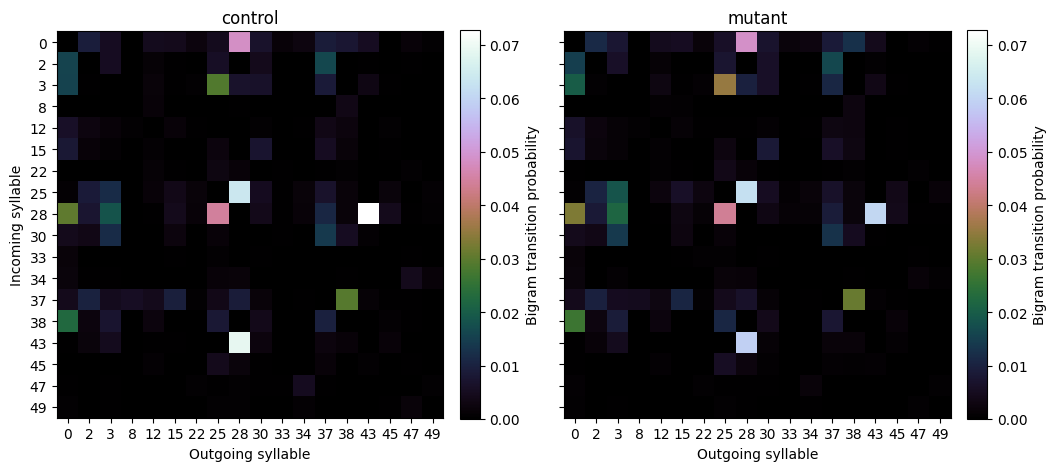

In [4]:
normalize='bigram' # normalization method ("bigram", "rows" or "columns")
trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_dirname, 
    normalize=normalize,
    min_frequency=0.005)    # minimum syllable frequency to include

kpms.visualize_transition_bigram(project_dir, model_dirname, 
                                 groups, trans_mats, syll_include, 
                                 normalize=normalize)

### Syllable Transition Graph
Render transition rates as directed graphs, where each node represents one syllable, and the directional edges represent transitions between syllables. The code below first generates a transition graph for each single group, and then generates a difference-graph for each pair of groups.

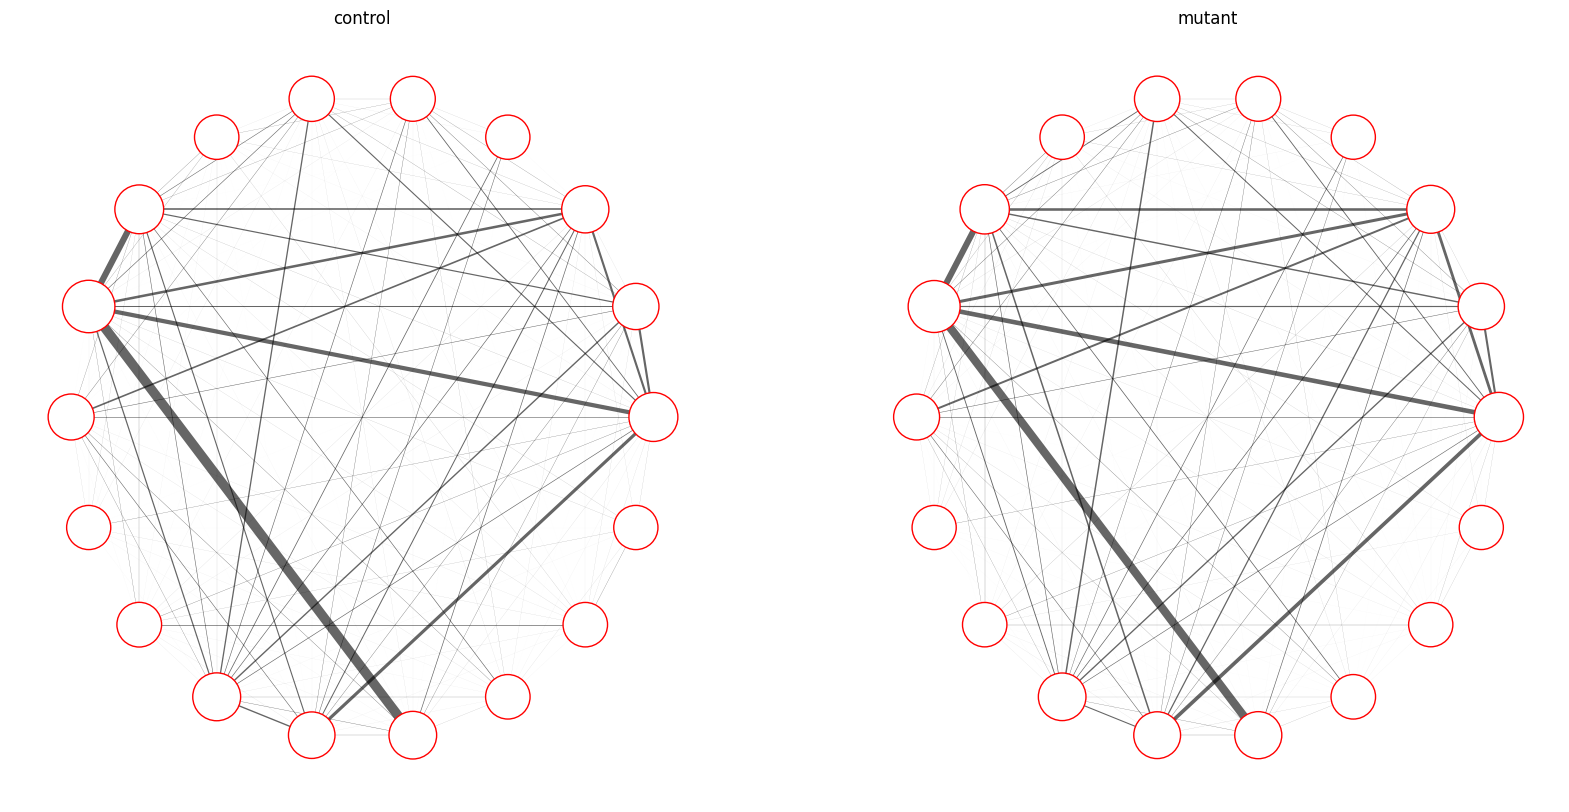

In [8]:
kpms.plot_transition_graph_group(project_dir, model_dirname, 
                                 groups, trans_mats, usages, syll_include, 
                                 layout='circular') # transition graph layout ("circular" or "spring")

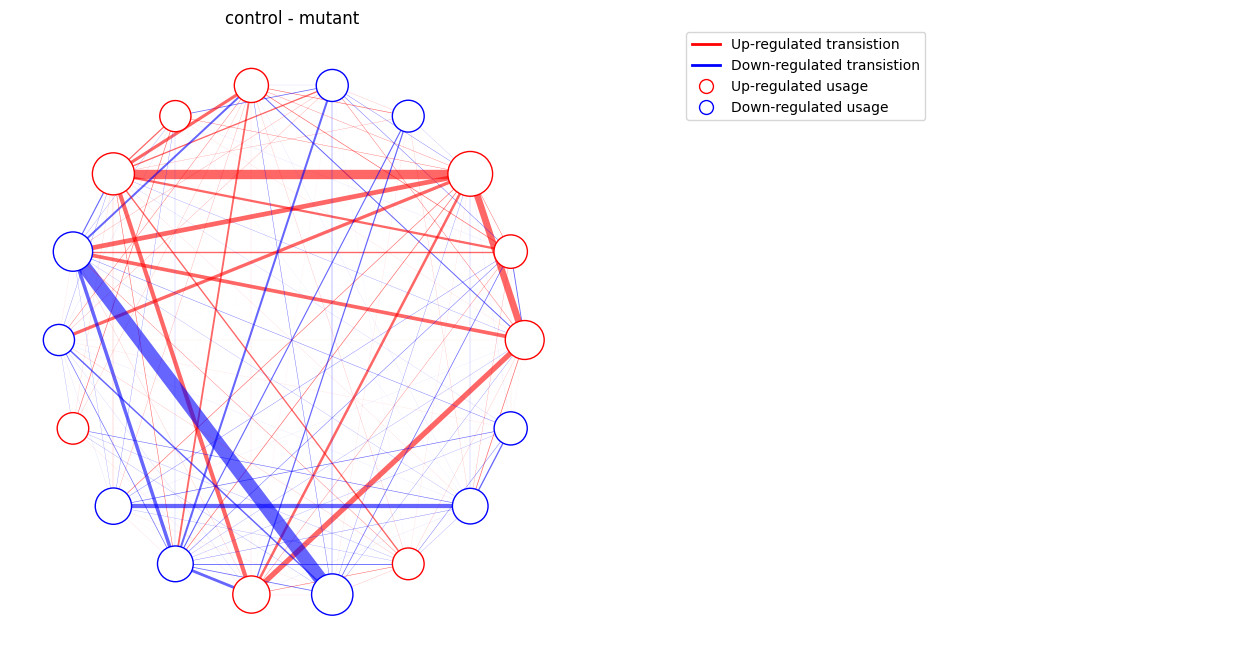

In [9]:
kpms.plot_transition_graph_difference(project_dir, model_dirname, 
                                      groups, trans_mats, usages, syll_include, 
                                      layout='circular') # transition graph layout ("circular" or "spring")